In [ ]:
!pip install -q tensorflow==2.11.1

In [ ]:
!pip install -q tensorflow-datasets==4.8.3

In [ ]:
!pip install -q tensorflow-recommenders==0.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install -q scann

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 69.2 MB/s eta 0:00:00


In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
ratings_dataset, ratings_dataset_info = tfds.load(
    name="movielens/100k-ratings",
    split="train",
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/0.1.1.incompleteQ7SA65/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


In [ ]:
ratings_dataset = ratings_dataset.map(
    lambda rating: {
        "user_id": rating["user_id"],
        "movie_id": rating["movie_id"],
        "movie_title": rating["movie_title"],
        "user_rating": rating["user_rating"],
        "timestamp": rating["timestamp"]
    }
)

display(tfds.as_dataframe(ratings_dataset.take(5), ratings_dataset_info))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


,movie_id,movie_title,timestamp,user_id,user_rating
0,b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",879024327,b'138',4.0
1,b'709',b'Strictly Ballroom (1992)',875654590,b'92',2.0
2,b'412',"b'Very Brady Sequel, A (1996)'",882075110,b'301',4.0
3,b'56',b'Pulp Fiction (1994)',883326919,b'60',4.0
4,b'895',b'Scream 2 (1997)',891409199,b'197',3.0


In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
# More info: https://www.tensorflow.org/api_docs/python/tf/random/set_seed

# Shuffle the elements of the dataset randomly.
ratings_dataset_shuffled = ratings_dataset.shuffle(
    # the new dataset will be sampled from a buffer window of first `buffer_size`
    # elements of the dataset
    buffer_size=100_000,
    # set the random seed that will be used to create the distribution.
    seed=42,
    # `list(dataset.as_numpy_iterator()` yields different result for each call
    # Because reshuffle_each_iteration defaults to True.
    reshuffle_each_iteration=False
)
# More info: https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

In [ ]:
ratings_trainset = ratings_dataset_shuffled.take(80_000)
ratings_testset = ratings_dataset_shuffled.skip(80_000)

In [ ]:
import tensorflow as tf

In [ ]:
user_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None)

In [ ]:
user_id_data = ratings_trainset.map(
    lambda rating: rating['user_id']
)

In [ ]:
user_id_lookup_layer.adapt(user_id_data)

In [ ]:
user_id_embedding_dim = 32

user_id_embedding_layer = tf.keras.layers.Embedding(
    input_dim=user_id_lookup_layer.vocabulary_size(),
    output_dim=user_id_embedding_dim
)

In [ ]:
user_id_model = tf.keras.Sequential(
    [
        user_id_lookup_layer,
        user_id_embedding_layer
    ]
)

In [ ]:
movie_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None)
movie_id_lookup_layer.adapt(
    ratings_trainset.map(
        lambda rating: rating["movie_id"]
    )
)

movie_id_embedding_dim = 32

movie_id_embedding_layer = tf.keras.layers.Embedding(
    input_dim=movie_id_lookup_layer.vocabulary_size(),
    output_dim=movie_id_embedding_dim
)

movie_id_model = tf.keras.Sequential(
    [
      movie_id_lookup_layer,
      movie_id_embedding_layer
    ]
)

In [ ]:
query_model = user_id_model
candidate_model = movie_id_model

In [ ]:
import tensorflow_recommenders as tfrs

In [ ]:
movies_dataset, movies_dataset_info = tfds.load(
    name="movielens/100k-movies",
    split="train",
    with_info=True
)

display(
    tfds.as_dataframe(movies_dataset.take(5), movies_dataset_info)
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/0.1.1.incompleteEKTRHX/movielens-train.tfrecord*...:…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


,movie_genres,movie_id,movie_title
0,4 (Comedy),b'1681',b'You So Crazy (1994)'
1,4 (Comedy)7 (Drama),b'1457',b'Love Is All There Is (1996)'
2,1 (Adventure)3 (Children),b'500',b'Fly Away Home (1996)'
3,0 (Action),b'838',b'In the Line of Duty 2 (1987)'
4,7 (Drama),b'1648',"b'Niagara, Niagara (1997)'"


In [ ]:
corpus = movies_dataset.map(
    lambda rating: rating['movie_id']
)

In [ ]:
retrieval_task_layer = tfrs.tasks.Retrieval(
    metrics=tfrs.metrics.FactorizedTopK(
        corpus.batch(128).map(candidate_model)
    )
)

In [ ]:
class RetrievalModel(tfrs.models.Model):
  def __init__(self, query_model, candidate_mode, retrieval_layer):
    super().__init__()
    self.query_model = query_model
    self.candidate_model = candidate_model
    self.retrieval_layer = retrieval_layer

  def compute_loss(self, features, training=False):
    query_embeddings = self.query_model(features['user_id'])
    candidate_embeddings = self.candidate_model(features['movie_id'])
    loss = self.retrieval_layer(query_embeddings, candidate_embeddings)
    return loss

In [ ]:
movielens_retrieval_model = RetrievalModel(query_model, candidate_model, retrieval_task_layer)

In [ ]:
movielens_retrieval_model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)
)

In [ ]:
retrieval_trainset = ratings_trainset.map(
    lambda rating: {
        "user_id": rating['user_id'],
        "movie_id": rating["movie_id"]
    }
).shuffle(100_000).batch(8192).cache()



retrieval_testset = ratings_testset.map(
    lambda rating: {
        "user_id": rating['user_id'],
        "movie_id": rating["movie_id"]
    }
).batch(4096).cache()

In [ ]:
history = movielens_retrieval_model.fit(
    retrieval_trainset,
    validation_data=retrieval_testset,
    validation_freq=1,
    epochs=5
)

Epoch 1/5
10/10 [==============================] - 46s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0012 - factorized_top_k/top_5_categorical_accuracy: 0.0095 - factorized_top_k/top_10_categorical_accuracy: 0.0205 - factorized_top_k/top_50_categorical_accuracy: 0.1045 - factorized_top_k/top_100_categorical_accuracy: 0.1848 - loss: 69800.7450 - regularization_loss: 0.0000e+00 - total_loss: 69800.7450 - val_factorized_top_k/top_1_categorical_accuracy: 0.0023 - val_factorized_top_k/top_5_categorical_accuracy: 0.0152 - val_factorized_top_k/top_10_categorical_accuracy: 0.0320 - val_factorized_top_k/top_50_categorical_accuracy: 0.1541 - val_factorized_top_k/top_100_categorical_accuracy: 0.2669 - val_loss: 28798.0488 - val_regularization_loss: 0.0000e+00 - val_total_loss: 28798.0488
Epoch 2/5
10/10 [==============================] - 38s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0028 - factorized_top_k/top_5_categorical_accuracy: 0.0193 - factorized_top_k/top_10_cate

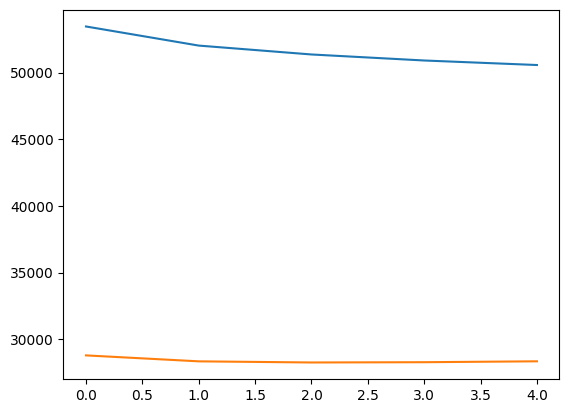

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
brute_force_layer=tfrs.layers.factorized_top_k.BruteForce(
    movielens_retrieval_model.query_model
)

In [ ]:
brute_force_layer.index_from_dataset(
    tf.data.Dataset.zip(
      (
          corpus.batch(100),
          corpus.batch(100).map(movielens_retrieval_model.candidate_model)
      )
  )
)

In [ ]:
score, movie_ids = brute_force_layer(tf.constant(["42"]))
print(f"Recommendations for user 42: {movie_ids[0, :3]}")

Recommendations for user 42: [b'468' b'924' b'369']


In [ ]:
scann_layer=tfrs.layers.factorized_top_k.ScaNN(
    movielens_retrieval_model.query_model
)

In [ ]:
scann_layer.index_from_dataset(
    tf.data.Dataset.zip(
        (
            corpus.batch(100),
            corpus.batch(100).map(movielens_retrieval_model.query_model)
        )
    )
)

## Ranking

In [ ]:
class RankingModel(tfrs.models.Model):
  def __init__(self, query_model, candidate_model):
    super().__init__()
    self.query_model = query_model
    self.candidate_model = candidate_model
    self.rating_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1),
        ]
    )
    self.ranking_task_layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def compute_loss(self, features, training=False):
    query_embeddings = self.query_model(features['user_id'])
    candidate_embeddings = self.candidate_model(features['movie_id'])
    rating_predictions = self.rating_model(
        tf.concat([query_embeddings, candidate_embeddings], axis=1)
    )
    loss = self.ranking_task_layer(
        predictions=rating_predictions,
        labels=features['user_rating'])
    return loss

In [ ]:
movielens_ranking_model = RankingModel(query_model, candidate_model)

movielens_ranking_model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1)
)

In [ ]:
ranking_ratings_trainset = ratings_trainset.shuffle(100_000).batch(8192).cache()
ranking_ratings_testset = ratings_testset.batch(4096).cache()

In [ ]:
history = movielens_ranking_model.fit(
    ranking_ratings_trainset,
    validation_data=ranking_ratings_testset,
    validation_freq=1,
    epochs=5
)

Epoch 1/5
10/10 [==============================] - 9s 641ms/step - root_mean_squared_error: 2.2765 - loss: 4.7519 - regularization_loss: 0.0000e+00 - total_loss: 4.7519 - val_root_mean_squared_error: 1.2462 - val_loss: 1.5225 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.5225
Epoch 2/5
10/10 [==============================] - 1s 78ms/step - root_mean_squared_error: 1.1335 - loss: 1.2648 - regularization_loss: 0.0000e+00 - total_loss: 1.2648 - val_root_mean_squared_error: 1.0656 - val_loss: 1.1043 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.1043
Epoch 3/5
10/10 [==============================] - 0s 44ms/step - root_mean_squared_error: 1.0414 - loss: 1.0775 - regularization_loss: 0.0000e+00 - total_loss: 1.0775 - val_root_mean_squared_error: 1.0174 - val_loss: 1.0031 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.0031
Epoch 4/5
10/10 [==============================] - 0s 45ms/step - root_mean_squared_error: 1.0148 - loss: 1.0256 - regularization_loss:

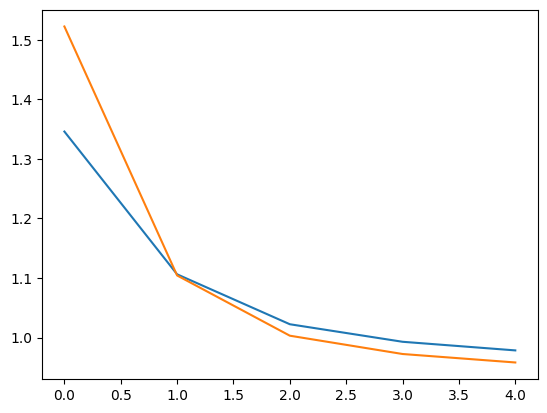

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
scann_layer.save(
    "/content/drive/MyDrive/Colab Notebooks/Recommender/1",
    options=tf.saved_model.SaveOptions(namespace_whitelist=["Scann"])
)

ValueError: ignored